# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 2 points
- PCA                  -> 2 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 9 points
</pre>

# 1. Regression 
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices. 

In [ ]:
import pandas as pd
data = pd.read_csv("Prices.csv")
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.2 point)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f963119bfd0>]],
      dtype=object)

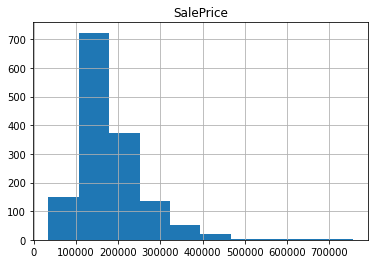

In [ ]:


data.hist("SalePrice")

**<font color='red'>Answer:</font>** 

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result. 
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section. 

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.05 point)**

1.880940746034036
0.1212103673013655


,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,548,0,61,0,0,0,0,0,2,2008
1,460,298,0,0,0,0,0,0,5,2007
2,608,0,42,0,0,0,0,0,9,2008
3,642,0,35,272,0,0,0,0,2,2006
4,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...
1455,460,0,40,0,0,0,0,0,8,2007
1456,500,349,0,0,0,0,0,0,2,2010
1457,252,0,60,0,0,0,0,2500,5,2010
1458,240,366,0,112,0,0,0,0,4,2010


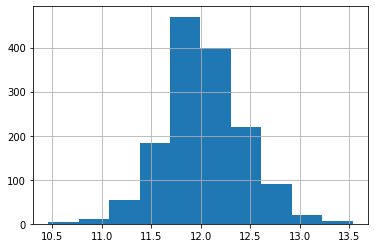

In [ ]:
from scipy.stats import skew

import numpy as np

new_data=data.copy()

print(skew(new_data['SalePrice']))
new_data['SalePrice']=np.log(new_data['SalePrice'])
print(skew(new_data['SalePrice']))



new_data['SalePrice'].hist()


bool_columns = new_data.applymap(np.isreal).all()

# df.info()
columns=new_data.columns


# find categorical columns
categorical_columns=[]
numerical_colunms=[]
for i in range(len(columns)):
    if bool_columns[i]==False:
        categorical_columns.append(columns[i])
    if bool_columns[i]==True:
        numerical_colunms.append(columns[i])
        
        
numerical_data= new_data[numerical_colunms]       
df=pd.get_dummies(new_data[categorical_columns])
finaly_numerical_datd=pd.concat([df,numerical_data],axis=1)




finaly_numerical_datd["SalePrice"].values
finaly_numerical_datd.columns
finaly_numerical_datd.iloc[:,260:-1]

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.25 point)** 



# 

### OverallQual    and GrLivArea      and GarageCars     have the hieghest coorelation And theyre value is positive  so both variables change in the same direction.

<font color='red'> **Answer:**</font>

**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods to deal with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(1.50 points)**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#Store the result in the following variables
MAE = []
RMSE = []
R2 = []
#TODO


#print the metrics
i = 0

for m in methods:
    dataset=finaly_numerical_datd.copy()
    if m =="dropping missing values" :
        
        dataset.dropna(axis=0,inplace=True,how="any")
    elif m=="mode imputation" :  
        dataset.fillna(df.mode(),inplace=True)
        dataset=dataset.replace(np.nan,0)
    else:
        strategy=m.split(" ")[0]
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
        dataset=imp.fit_transform(dataset)
        
        
    
       
    dataset=pd.DataFrame(dataset)    
    x=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1].values
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
    model=LinearRegression().fit(xtrain,ytrain) 
   
    yhat=model.predict(xtest)
    
    
    MAE.append(mean_absolute_error(ytest,yhat))
    RMSE.append(mean_squared_error(ytest,yhat))
    R2.append(r2_score(ytest,yhat))
    print("Method: " + m + "  MAE: " + str(MAE[i]) + "  RMSE: " + str(RMSE[i]) + "  R2: " + str(R2[i]))
    i+=1


Method: mean imputation  MAE: 333.57941436553114  RMSE: 8101701.060500617  R2: -48143529.72043482
Method: median imputation  MAE: 26.469332990377644  RMSE: 65414.43290452872  R2: -388717.58349021856
Method: mode imputation  MAE: 0.0872152700088956  RMSE: 0.024563542201419892  R2: 0.8540336603701244
Method: dropping missing values  MAE: 559.334114494046  RMSE: 17693672.677497484  R2: -120797501.89980614


In [ ]:
print(ytest[0:20])
yhat[0:20].round(2)
# r2_score(ytest[0:75],yhat[0:75].round(0))


[11.79433792 11.6784399  11.74799759 11.85082525 12.25486281 12.73596533
 11.78600139 11.92503512 11.7905572  12.23563145 12.93675161 12.90420737
 12.31716669 11.87756858 12.87901712 12.07823927 11.79810441 11.81303006
 12.01364014 11.9511804 ]


array([11.83, 11.65, 11.73, 11.78, 12.23, 12.74, 11.8 , 11.96, 11.62,
       12.18, 12.88, 12.98, 12.28, 11.92, 12.52, 12.  , 11.73, 11.75,
       12.15, 12.  ])

<font color='red'> **Answer:**</font>

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [ ]:
mae_best =  0.09805344882247011  #best MAE
rmse_best =0.021131692697953477 #best RMSE
r2_best =  0.8744270753781864   #best R2

# 1.2 Principal Component Analysis (PCA) (2 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better). 
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (0.5point)**

In [ ]:
from sklearn.decomposition import PCA
dataset=finaly_numerical_datd.copy() 
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
dataset=pd.DataFrame(dataset)  
dataset=imp.fit_transform(dataset)
dataset=pd.DataFrame(dataset) 
x=dataset.iloc[:,200:-1].values
y=dataset.iloc[:,-10].values
pca=PCA(n_components=10).fit(x)
x=pca.transform(x)
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)
# model=LinearRegression().fit(xtrain,ytrain)         


#TODO: initialize pca, pass, whiten=True, svd_solver='randomized', random_state=0


#TODO: fit pc
x.shape


(1460, 10)

**1.2.2. What percentage of the variance is explained by the first five components? (0.10 point)**

In [ ]:
sum(pca.explained_variance_ratio_[0:5])

0.9983242895789477

<font color='red'> **Answer:**</font>

It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation. 

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

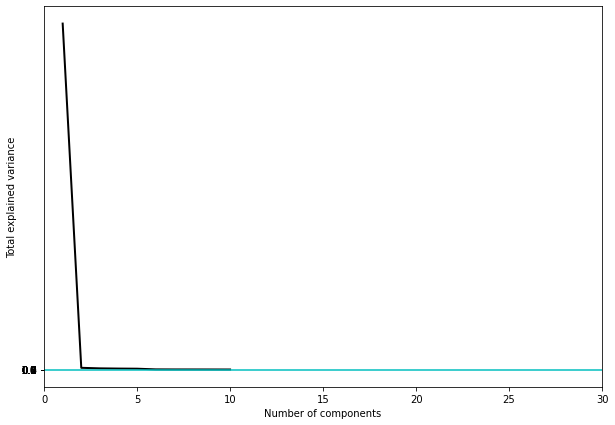

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
import matplotlib.pyplot as plt

Number_of_Components=[i for i in range(1,11)]
explained_variance=pca.explained_variance_
plt.figure(figsize=(10,7))
lw=2
plt.plot(Number_of_Components,explained_variance, color='k', lw=lw)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
    
plt.xlim(0, 30)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()
Number_of_Components

<font color='red'> **Answer:**</font>

**1.2.5. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.20 points)**

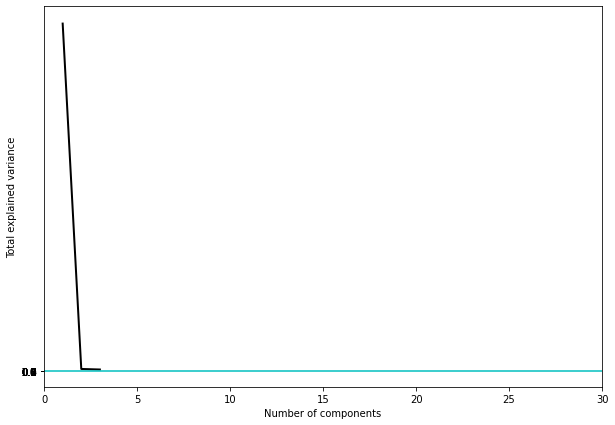

[1, 2, 3]

In [ ]:
from sklearn.decomposition import PCA
dataset=finaly_numerical_datd.copy() 
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
dataset=pd.DataFrame(dataset)  
dataset=imp.fit_transform(dataset)
dataset=pd.DataFrame(dataset) 
x=dataset.iloc[:,200:-1].values
y=dataset.iloc[:,-10].values
pca=PCA(n_components=3).fit(x)
x=pca.transform(x)


Number_of_Components=[i for i in range(1,4)]
explained_variance=pca.explained_variance_
plt.figure(figsize=(10,7))
lw=2
plt.plot(Number_of_Components,explained_variance, color='k', lw=lw)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
    
plt.xlim(0, 30)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()
Number_of_Components

**1.2.6. Use the new components derived from PCA to predict the house prices. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.60 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.5```*

In [ ]:
pca_X = pca.transform(X)


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
MAE = []
RMSE = []
R2 = []
    
X_train_pca, X_test_pca, y_train_pca, y_test_pca = #TODO

regressor = LinearRegression()

#TODO: train the regression model

y_predicted_pca = #TODO: predict on test dataset

mae_pca = #TODO: mean absolute error
rmse_pca = #TODO: root mean squared error
r2_pca = #TODO: R^2

    
print("MAE: " + str(mae_pca) + "  RMSE: " + str(rmse_pca) + "  R2: " + str(r2_pca))


SyntaxError: ignored

**1.2.7 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.1 point)**

In [ ]:
print("MAE difference after PCA: ", mae_best-mae_pca)
print("RMSE difference after PCA: ", rmse_best-rmse_pca)
print("R2 difference after PCA: ", r2_best-r2_pca)

<font color='red'> **Answer:**</font>

## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
<br>
Unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on 
- 1.3.1 Cross-validation 
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the Lecture 7.* <br><br>
    
- 1.3.2 Regularization 
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

<font color='red'> **Answer:**</font>

**1.3.1 Please apply K-fold=10 fold cross validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = KFold(#TODO: pass parameeter)
#TODO: create model

#TODO: evaluate model using R^2, and MSE as evaluation metrics
#While setting MSE metrics, make sure you pass the right keyword 


# report performance
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

In [ ]:
plt.figure(figsize=(16,6))
#TODO: plot the trendlines

<font color='red'> **Answer:**</font>

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge


cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha 
alpha = [] 



# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the lasso model where alpha=i * 0.0001

    #TODO: fit the lasso model on whole X, y
    #TODO: perform 10 fold cross validation and store the result in score variable
    scores = #TODO 
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_lasso.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
    
    


**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Lasso Regression Model 
from sklearn.model_selection import train_test_split
lassoModelBest = Lasso(#TODO: pass the best alpha value) 

#TODO: Fit the model again 
  
# Evaluating the Lasso Regression model 
print(lassoModelBest.score(X_test, y_test)) 

**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [ ]:
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 



# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the ridge model where alpha=i * 0.0001

    #TODO: fit the ridge model on whole X, y
    #TODO: perform 10 fold cross validation and store the result in score variable
    scores = #TODO 
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
    
    


**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
# Building and fitting the Ridge Regression Model 
from sklearn.model_selection import train_test_split
ridgeModelBest = Ridge(#TODO: pass the best alpha value) 

#TODO: Fit the model again 
  
# Evaluating the ridge Regression model 
print(ridgeModelBest.score(X_test, y_test)) 